# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
df = pd.read_csv('Datasets/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Exploring the datasets

In [3]:
df.shape

(8124, 23)

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
for col in df.columns:
    df[col] = df[col].astype('category')
    print(df[col].value_counts())
    print('='*50)

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

In [8]:
df.drop(columns='veil-type', inplace=True)

# Visualization

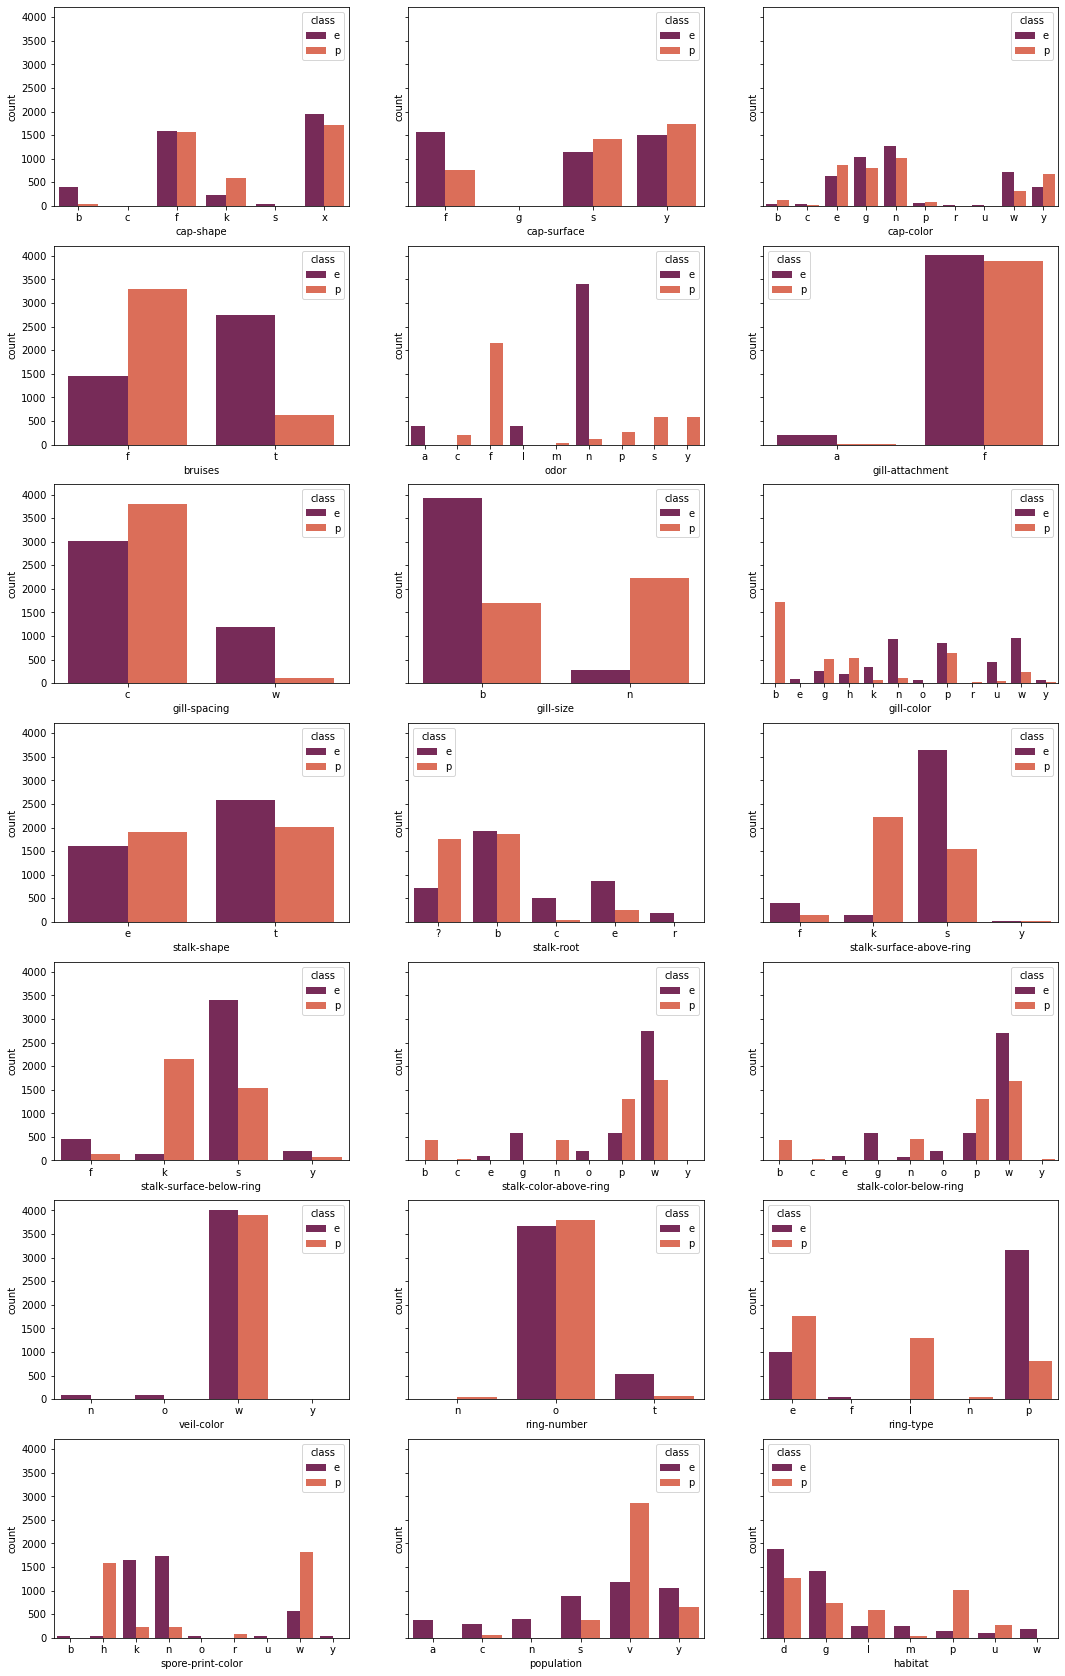

In [9]:
fig, axes = plt.subplots(nrows=7,ncols=3, figsize=(18,30),sharey=True)
idx = 0
for col in df.columns[1:]:
    sns.countplot(data=df,x=col, hue='class' ,ax=axes[idx//3][idx%3], palette='rocket')
    idx += 1

# Converting Categorical Data to Numerical Data

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype==np.number:
        continue
    df = df.apply(le.fit_transform)

<ipython-input-10-6692e12ab87d>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype==np.number:


In [11]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


# Finding Correlation among different features

<AxesSubplot:>

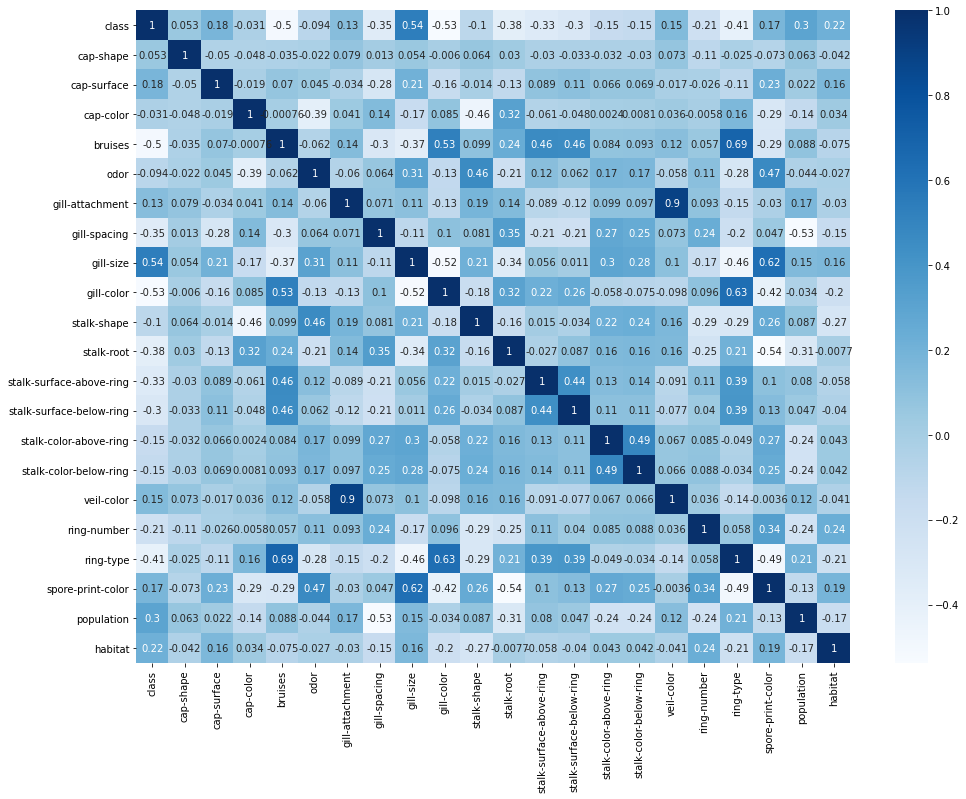

In [12]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), cmap='Blues', annot=True)

In [13]:
df.corr()['class'].sort_values()

gill-color                 -0.530566
bruises                    -0.501530
ring-type                  -0.411771
stalk-root                 -0.379361
gill-spacing               -0.348387
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
ring-number                -0.214366
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
stalk-shape                -0.102019
odor                       -0.093552
cap-color                  -0.031384
cap-shape                   0.052951
gill-attachment             0.129200
veil-color                  0.145142
spore-print-color           0.171961
cap-surface                 0.178446
habitat                     0.217179
population                  0.298686
gill-size                   0.540024
class                       1.000000
Name: class, dtype: float64

# Dividing the data into dependent and independent features

In [14]:
X = df.iloc[:,1:]
y= df['class']
X.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold
skf = KFold(n_splits=5, shuffle=True)

In [16]:
accurecy_report = dict()
def trainwith(modelname):
    print(f'using model: {modelname} '.center(100,'='),'\n')
    idx = 0
    model_accurecy =[]
    for _train,_test in skf.split(X, y):
        idx += 1
        print(f'Fold Number {idx} '.center(100,'='), '\n')
        modelname.fit(X.iloc[_train],y.iloc[_train])
        print('Confusion Matrix'.center(70,'-'), '\n')
        ypred = modelname.predict(X.iloc[_test])
        sns.heatmap(confusion_matrix(y.iloc[_test],ypred), annot=True, fmt='d', cmap='rocket',cbar=False)
        plt.show()
        print('Classification Report'.center(70,'-'), '\n')
        print(classification_report(y.iloc[_test],ypred))
        model_accurecy.append(accuracy_score(y.iloc[_test],ypred))
    print('='*100)
    print('The average accurecy of this model is {:.02f}%'.format(np.array(model_accurecy).mean()*100))
    accurecy_report[str(modelname)] = round(np.array(model_accurecy).mean()*100,2)    

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

==========================using model: LogisticRegression(max_iter=1000) =========================== 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 



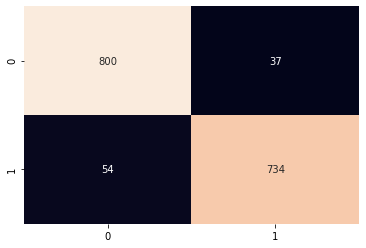

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       837
           1       0.95      0.93      0.94       788

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 



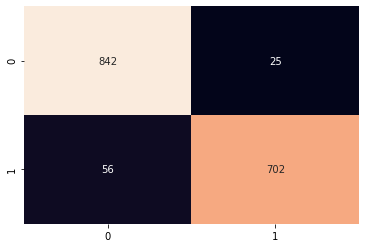

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       867
           1       0.97      0.93      0.95       758

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

===========================================Fold Number 3 =========================================== 

---------------------------Confusion Matrix--------------------------- 



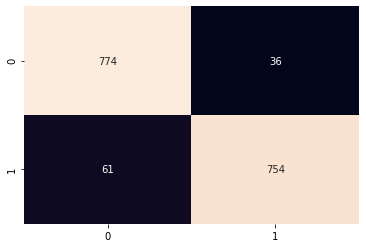

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       810
           1       0.95      0.93      0.94       815

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625

===========================================Fold Number 4 =========================================== 

---------------------------Confusion Matrix--------------------------- 



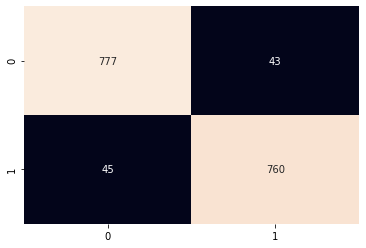

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       820
           1       0.95      0.94      0.95       805

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

===========================================Fold Number 5 =========================================== 

---------------------------Confusion Matrix--------------------------- 



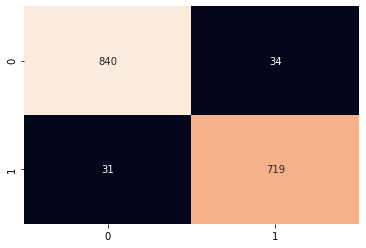

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       874
           1       0.95      0.96      0.96       750

    accuracy                           0.96      1624
   macro avg       0.96      0.96      0.96      1624
weighted avg       0.96      0.96      0.96      1624

The average accurecy of this model is 94.81%


In [18]:
logReg = LogisticRegression(max_iter=1000)
trainwith(logReg)

========================================using model: SVC() ========================================= 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 



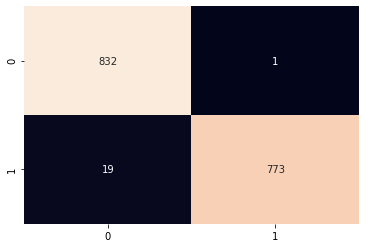

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       833
           1       1.00      0.98      0.99       792

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 



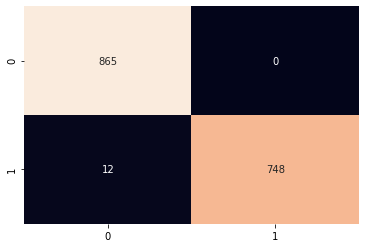

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       865
           1       1.00      0.98      0.99       760

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

===========================================Fold Number 3 =========================================== 

---------------------------Confusion Matrix--------------------------- 



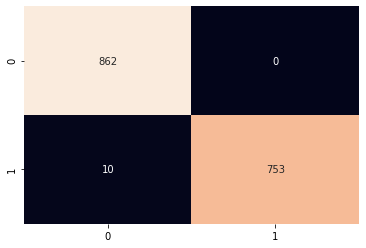

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       862
           1       1.00      0.99      0.99       763

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

===========================================Fold Number 4 =========================================== 

---------------------------Confusion Matrix--------------------------- 



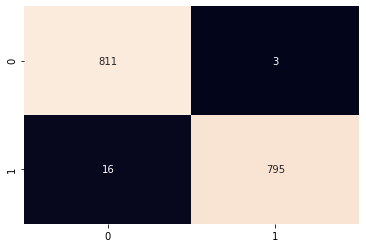

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       814
           1       1.00      0.98      0.99       811

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

===========================================Fold Number 5 =========================================== 

---------------------------Confusion Matrix--------------------------- 



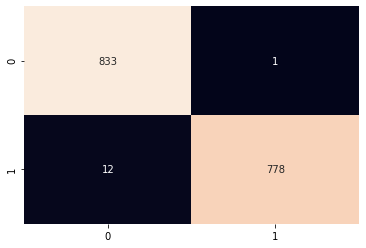

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       834
           1       1.00      0.98      0.99       790

    accuracy                           0.99      1624
   macro avg       0.99      0.99      0.99      1624
weighted avg       0.99      0.99      0.99      1624

The average accurecy of this model is 99.09%


In [19]:
svc_model = SVC()
trainwith(svc_model)

===================================using model: MLPClassifier() ==================================== 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 



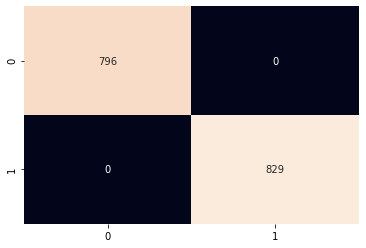

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       796
           1       1.00      1.00      1.00       829

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 



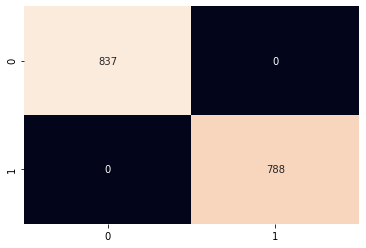

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       837
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 3 =========================================== 

---------------------------Confusion Matrix--------------------------- 



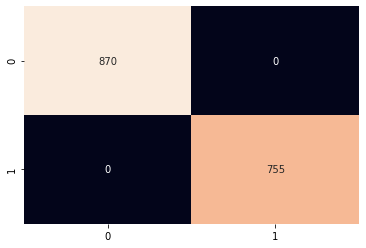

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       870
           1       1.00      1.00      1.00       755

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 4 =========================================== 

---------------------------Confusion Matrix--------------------------- 



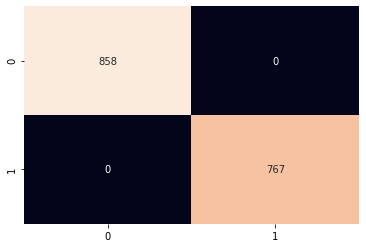

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       858
           1       1.00      1.00      1.00       767

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 5 =========================================== 

---------------------------Confusion Matrix--------------------------- 



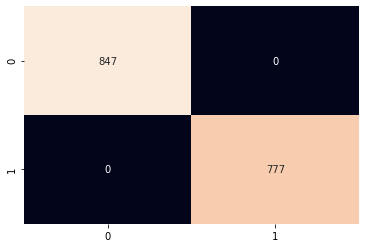

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       847
           1       1.00      1.00      1.00       777

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624

The average accurecy of this model is 100.00%


In [20]:
nlp_model = MLPClassifier()
trainwith(nlp_model)

================================using model: KNeighborsClassifier() ================================ 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 



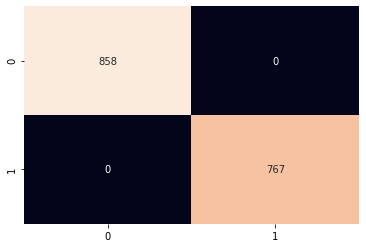

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       858
           1       1.00      1.00      1.00       767

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 



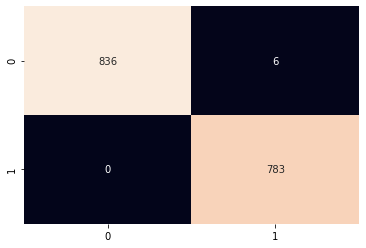

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       842
           1       0.99      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 3 =========================================== 

---------------------------Confusion Matrix--------------------------- 



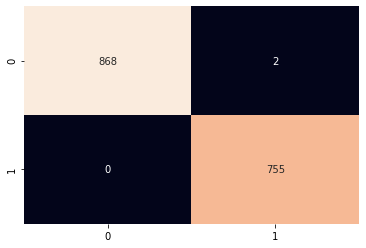

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       870
           1       1.00      1.00      1.00       755

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 4 =========================================== 

---------------------------Confusion Matrix--------------------------- 



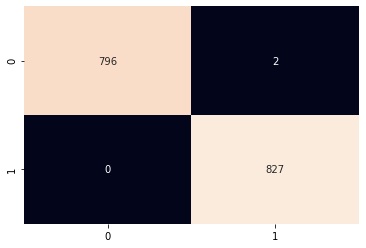

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       827

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 5 =========================================== 

---------------------------Confusion Matrix--------------------------- 



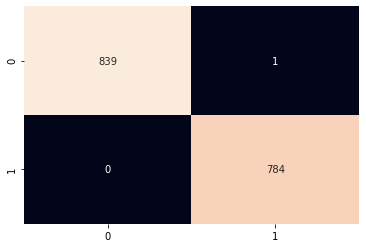

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       1.00      1.00      1.00       784

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624

The average accurecy of this model is 99.86%


In [21]:
knn_model = KNeighborsClassifier()
trainwith(knn_model)

===============================using model: RandomForestClassifier() =============================== 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 



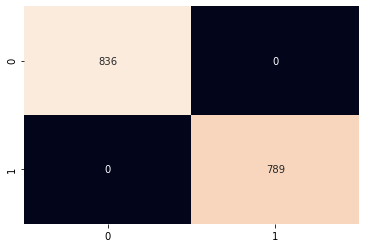

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       836
           1       1.00      1.00      1.00       789

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 



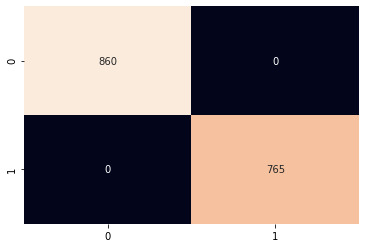

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       765

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 3 =========================================== 

---------------------------Confusion Matrix--------------------------- 



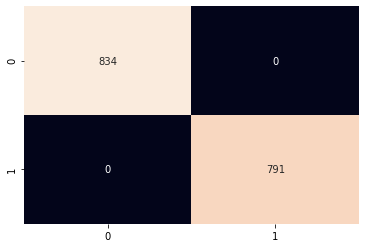

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       834
           1       1.00      1.00      1.00       791

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 4 =========================================== 

---------------------------Confusion Matrix--------------------------- 



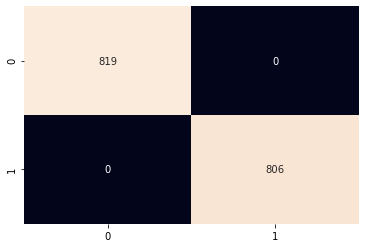

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       819
           1       1.00      1.00      1.00       806

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 5 =========================================== 

---------------------------Confusion Matrix--------------------------- 



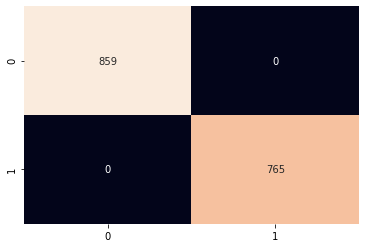

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       859
           1       1.00      1.00      1.00       765

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624

The average accurecy of this model is 100.00%


In [22]:
rf_model = RandomForestClassifier()
trainwith(rf_model)

===============================using model: DecisionTreeClassifier() =============================== 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 



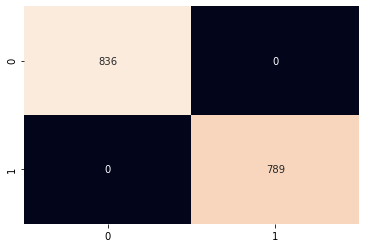

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       836
           1       1.00      1.00      1.00       789

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 



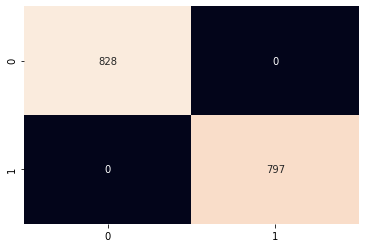

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       828
           1       1.00      1.00      1.00       797

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 3 =========================================== 

---------------------------Confusion Matrix--------------------------- 



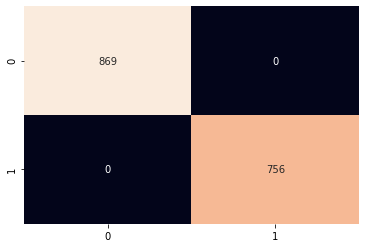

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           1       1.00      1.00      1.00       756

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 4 =========================================== 

---------------------------Confusion Matrix--------------------------- 



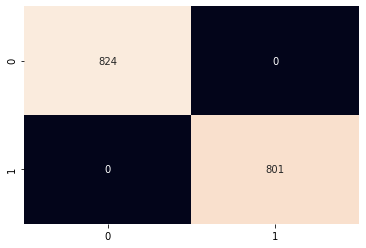

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       824
           1       1.00      1.00      1.00       801

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 5 =========================================== 

---------------------------Confusion Matrix--------------------------- 



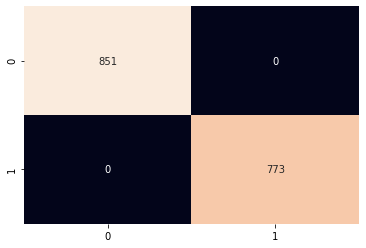

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       851
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624

The average accurecy of this model is 100.00%


In [23]:
dt_model = DecisionTreeClassifier()
trainwith(dt_model)

# Conclusion

In [24]:
accurecy_report

{'LogisticRegression(max_iter=1000)': 94.81,
 'SVC()': 99.09,
 'MLPClassifier()': 100.0,
 'KNeighborsClassifier()': 99.86,
 'RandomForestClassifier()': 100.0,
 'DecisionTreeClassifier()': 100.0}